<a href="https://colab.research.google.com/github/ktyptorio/Statistics-HandsOn/blob/main/Inferential_Statistics_Hands_on.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Dataset Preparation

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from itertools import permutations
from itertools import combinations
from scipy import stats

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
path = "/content/drive/MyDrive/datafm20.csv"
dataset = pd.read_csv(path)

In [4]:
for i in range(len(dataset)):
  dataset['Name'][i] = dataset['Name'][i].encode('ascii', 'ignore').decode()
  dataset['Division'][i] = dataset['Division'][i].encode('ascii', 'ignore').decode()  

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [9]:
dataset

,Unnamed: 0,Name,Position,Club,Division,Based,Nation,Height,Weight,Age,Preferred Foot,Best Pos,Best Role,Value,Wage,CA,PA,Wor,Vis,Thr,Tec,Tea,Tck,Str,Sta,TRO,Ref,Pun,Pos,Pen,Pas,Pac,1v1,OtB,Nat,Mar,L Th,Lon,Ldr,Kic,Jum,Hea,Han,Fre,Fla,Fir,Fin,Ecc,Dri,Det,Dec,Cro,Cor,Cnt,Cmp,Com,Cmd,Bra,Bal,Ant,Agi,Agg,Aer,Acc
0,0,Lionel Messi,"AM (RC), ST (C)",Barcelona,Spanish First Division,Spain (First Division),ARG,170,72,32,Left,AM (R),IF,73000000,1200000,195,200,7,20,2,20,14,7,9,13,3,1,2,5,17,20,15,2,16,14,4,4,17,14,1,6,10,2,19,20,19,20,2,20,20,20,15,15,13,18,2,2,10,19,19,19,7,2,18
1,1,Cristiano Ronaldo,"AM (RL), ST (C)",Juventus,Italian Serie A,Italy (Serie A),POR,185,83,34,Either,ST (C),CF,31000000,950000,195,196,10,14,2,17,10,8,16,15,3,2,2,6,20,15,16,2,18,20,4,3,19,17,3,17,19,3,15,18,17,19,1,15,20,18,15,13,16,14,4,1,16,14,18,13,6,2,15
2,2,Kylian Mbapp,"AM (RL), ST (C)",Paris SG,Ligue 1 Conforama,France (Ligue 1 Conforama),FRA,178,73,20,Right,ST (C),AF,86000000,375000,181,196,10,13,1,17,10,2,11,14,2,1,1,2,15,13,20,3,18,15,2,2,12,10,4,8,7,3,10,18,16,17,3,18,14,16,13,10,13,18,2,1,12,14,17,16,6,4,20
3,3,Manuel Neuer,GK,FC Bayern,Bundesliga,Germany (Bundesliga),GER,192,90,33,Either,GK,SK,44000000,250000,176,193,14,12,19,12,18,3,16,10,20,14,8,15,10,13,10,15,1,13,3,3,3,13,18,15,10,14,13,6,13,3,18,3,18,16,2,10,15,20,12,17,14,14,19,15,8,14,13
4,4,Neymar,"M (L), AM (LC), ST (C)",Paris SG,Ligue 1 Conforama,France (Ligue 1 Conforama),BRA,175,68,27,Right,AM (L),IW,91000000,600000,186,190,10,16,1,20,8,1,10,13,1,4,2,2,17,16,16,1,18,14,1,2,15,14,2,6,8,2,17,20,18,16,1,20,16,15,16,16,10,17,3,1,14,14,16,18,10,4,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144745,144745,Yuan Jinxing,ST (C),Unknown,Unknown,China,CHN,169,81,41,Right Only,ST (C),P,0,0,3,3,3,1,4,6,2,1,1,6,2,2,1,1,2,1,9,3,12,13,1,1,2,4,1,5,4,3,1,8,10,7,3,6,7,5,1,2,3,7,3,3,2,3,9,8,8,1,11
144746,144746,Aizudin Abdul Rahman,M (C),BSRC,Bruneian Premier League,Brunei (Premier League),BRU,180,69,24,Right Only,M (C),CM,0,0,2,2,9,4,3,5,5,4,3,5,1,3,1,6,1,10,12,3,4,12,6,1,3,14,3,9,1,1,2,1,7,3,1,1,9,10,1,2,2,4,1,3,1,3,4,9,14,2,9
144747,144747,Berlin Jean-Gilles,ST (C),CS Monteuil,Premire Ligue de soccer du Qubec,Canada (PLSQ),HAI,180,79,32,Right Only,ST (C),P,300,6,2,2,2,1,3,1,1,1,2,7,2,2,3,1,6,1,9,3,8,14,1,1,1,13,2,5,10,3,1,4,5,11,2,1,6,6,1,1,1,8,3,1,1,2,4,10,6,3,11
144748,144748,Frederik van Hauen,M (C),Skovshoved,2. Division,Denmark (2. Division),DEN,195,85,19,Right Only,M (C),CM,0,0,1,2,8,7,2,8,6,4,6,4,3,3,3,4,1,3,1,1,6,13,4,1,5,9,1,13,3,3,2,2,10,2,2,4,12,13,3,3,4,3,3,3,3,4,4,3,16,1,5


#Inferential Statistics

Inferential statistics refers to methods that rely on probability and distribution theory in particular to predict population values ​​based on sample data. These statistical methods are designed to contribute to the process of making scientific judgments in the face of uncertainty and variation. In this section, we will learn about:

1. Basic Probability Formula
2. Combinatorics
3. Conditional Probability
4. Probability distributions
  * Discrete Probability Distributions
  * Continous Probability Distributions
5. Central limit theorem
6. Estimation
  * Point estimate
  * Confidence interval
7. Hypothesis testing

##1. Basic Probability Formula

An understanding of probability is the basis for stepping into Inferential Statistics. In order to understand the concept of probability further, we need to know some terminology such as outcomes, sample spaces, events, etc




> If **outcome** is a term for the result of an experiment, then the set of all possible outcomes of a statistical experiment is called the **sample space** and is represented by the symbol S.

For example, based on the given dataset, we have a sample space of football player positions.

In [ ]:
dataset['Best Pos'].sort_values().unique()

array(['AM (C)', 'AM (L)', 'AM (R)', 'D (C)', 'D (L)', 'D (R)', 'DM',
       'GK', 'M (C)', 'M (L)', 'M (R)', 'ST (C)', 'WB (L)', 'WB (R)'],
      dtype=object)



> An **event** is a subset of a sample space.

Given the sample space S = {x | x is a football player positions}, then the event A that a Attacking Midfield position is a subset A = {x|x is AM position}.

> The **complement** of an event A with respect to S is the subset of all elements of S that are not in A. We denote the complement of A by the symbol A'.

Given the sample space above, then the complement of A is A' = {'D (C)', 'D (L)', 'D (R)', 'DM','GK', 'M (C)', 'M (L)', 'M (R)', 'ST (C)', 'WB (L)', 'WB (R)'}

> The **intersection** of two events A and B, denoted by the symbol A ∩ B, is the
event containing all elements that are common to A and B.

Given the sample space is all football player in our dataset

Let E be the event that a football player in Striker Position, and let F be the event that a Right Preferred Foot football player. Then E ∩ F is the event of all striker with preferred foot is Right Foot.

In [ ]:
dataset[(dataset['Best Pos'] == 'ST (C)') & (dataset['Preferred Foot'] == 'Right')].head(10)

,Unnamed: 0,Name,Position,Club,Division,Based,Nation,Height,Weight,Age,Preferred Foot,Best Pos,Best Role,Value,Wage,CA,PA,Wor,Vis,Thr,Tec,Tea,Tck,Str,Sta,TRO,Ref,Pun,Pos,Pen,Pas,Pac,1v1,OtB,Nat,Mar,L Th,Lon,Ldr,Kic,Jum,Hea,Han,Fre,Fla,Fir,Fin,Ecc,Dri,Det,Dec,Cro,Cor,Cnt,Cmp,Com,Cmd,Bra,Bal,Ant,Agi,Agg,Aer,Acc
2,2,Kylian Mbapp,"AM (RL), ST (C)",Paris SG,Ligue 1 Conforama,France (Ligue 1 Conforama),FRA,178,73,20,Right,ST (C),AF,86000000,375000,181,196,10,13,1,17,10,2,11,14,2,1,1,2,15,13,20,3,18,15,2,2,12,10,4,8,7,3,10,18,16,17,3,18,14,16,13,10,13,18,2,1,12,14,17,16,6,4,20
7,7,Luis Surez,"AM (RLC), ST (C)",A. Madrid,Spanish First Division,Spain (First Division),URU,182,86,32,Right,ST (C),DLF,55000000,245000,180,188,16,16,2,17,15,10,13,15,3,3,3,10,12,16,14,2,17,16,8,8,16,15,1,13,14,3,17,18,16,18,1,15,19,15,15,13,15,17,3,1,17,12,16,14,17,3,14
15,15,Robert Lewandowski,ST (C),FC Bayern,Bundesliga,Germany (Bundesliga),POL,184,78,30,Right,ST (C),PF,80000000,325000,184,184,18,13,2,16,16,7,16,19,3,1,2,8,19,13,13,1,17,19,6,5,12,12,1,14,16,3,14,13,18,19,1,13,14,18,10,7,15,17,3,2,18,20,15,13,18,1,14
40,40,Gonzalo Higuan,ST (C),Juventus,Italian Serie A,Italy (Serie A),ARG,184,89,31,Right,ST (C),DLF,55000000,230000,166,180,16,14,2,16,18,8,16,14,2,2,4,5,14,15,14,1,17,14,8,9,16,12,1,12,15,1,12,13,14,18,3,14,16,17,12,8,11,16,1,3,14,15,18,11,17,3,12
62,62,Radamel Falcao,ST (C),Galatasaray,Turkish Super League,Turkey (Super League),COL,177,72,33,Right,ST (C),DLF,4000000,97000,135,176,11,15,1,15,15,6,11,7,1,2,3,6,17,13,11,1,16,13,4,3,12,17,3,11,16,3,14,16,14,16,4,12,18,14,12,10,14,17,3,2,15,13,14,13,13,2,11
64,64,Troy Parrott,ST (C),Ipswich,Sky Bet League One,England (Sky Bet League One),IRL,183,73,17,Right,ST (C),CF,7000000,10000,120,176,14,11,2,14,11,8,11,12,2,2,1,9,12,11,13,3,10,8,9,6,13,12,1,11,16,3,11,11,13,15,4,12,17,11,11,9,10,12,2,2,8,13,13,13,15,1,12
65,65,Gabriel Jesus,"AM (RL), ST (C)",Man City,English Premier Division,England (Premier Division),BRA,179,73,22,Right,ST (C),AF,49000000,90000,156,175,16,13,2,16,13,9,12,13,3,3,3,7,13,14,15,1,17,14,8,6,11,7,2,10,12,2,10,16,15,14,3,16,13,13,10,11,14,14,1,3,12,14,14,17,12,3,16
68,68,Lautaro Martnez,ST (C),Inter,Italian Serie A,Italy (Serie A),ARG,174,79,21,Right,ST (C),PF,46500000,46000,161,175,17,12,1,16,15,8,14,15,3,1,2,8,15,12,15,1,16,16,7,3,14,11,2,13,15,3,9,15,17,15,1,14,19,15,9,4,11,14,3,3,18,14,15,16,17,2,15
76,76,Roberto Firmino,"AM (RLC), ST (C)",Liverpool,English Premier Division,England (Premier Division),BRA,181,76,27,Right,ST (C),DLF,63000000,180000,168,175,18,17,1,18,18,14,14,16,2,2,2,14,12,15,13,1,16,17,13,7,11,6,3,11,14,4,9,17,17,13,1,15,14,14,14,11,15,17,3,3,13,17,16,15,13,2,13
82,82,Edinson Cavani,ST (C),Man Utd,English Premier Division,England (Premier Division),URU,184,71,32,Right,ST (C),P,51000000,325000,159,174,16,10,3,13,14,8,14,17,3,1,1,12,17,11,14,1,17,17,8,5,13,13,1,14,18,2,10,14,13,17,2,13,16,12,11,5,16,17,1,3,18,15,17,14,14,3,14


> Two events A and B are **mutually exclusive**, or **disjoint**, if A ∩ B = ∅, that is, if A and B have no elements in common.

Given the sample space is all football player in our dataset

Let E be the event that a football player in English Premier Division, and let F be the event Indonesian football player. Then E ∩ F is the event of indonesian football player which based in English Premier Division. The result is...

In [ ]:
dataset[(dataset['Nation'] == 'INA') & (dataset['Division'] == 'English Premier Division')]

,Unnamed: 0,Name,Position,Club,Division,Based,Nation,Height,Weight,Age,Preferred Foot,Best Pos,Best Role,Value,Wage,CA,PA,Wor,Vis,Thr,Tec,Tea,Tck,Str,Sta,TRO,Ref,Pun,Pos,Pen,Pas,Pac,1v1,OtB,Nat,Mar,L Th,Lon,Ldr,Kic,Jum,Hea,Han,Fre,Fla,Fir,Fin,Ecc,Dri,Det,Dec,Cro,Cor,Cnt,Cmp,Com,Cmd,Bra,Bal,Ant,Agi,Agg,Aer,Acc


> The **union** of the two events A and B, denoted by the symbol A∪B, is the event containing all the elements that belong to A or B or both.

Given the sample space is all football player in English Premier Division

Let E the event that a Manchester United players and F the event that Manchester City Players. Then E∪F is the event of football players in Manchester United and Manchester City, here it is...

In [ ]:
mu_mc_player = dataset[(dataset['Club'] == 'Man Utd') | (dataset['Club'] == 'Man City')]
mu_mc_player

,Unnamed: 0,Name,Position,Club,Division,Based,Nation,Height,Weight,Age,Preferred Foot,Best Pos,Best Role,Value,Wage,CA,PA,Wor,Vis,Thr,Tec,Tea,Tck,Str,Sta,TRO,Ref,Pun,Pos,Pen,Pas,Pac,1v1,OtB,Nat,Mar,L Th,Lon,Ldr,Kic,Jum,Hea,Han,Fre,Fla,Fir,Fin,Ecc,Dri,Det,Dec,Cro,Cor,Cnt,Cmp,Com,Cmd,Bra,Bal,Ant,Agi,Agg,Aer,Acc
6,6,Kevin De Bruyne,"M (RLC), AM (C)",Man City,English Premier Division,England (Premier Division),BEL,181,70,27,Either,M (C),MEZ,88000000,230000,188,188,15,20,3,17,14,9,13,17,2,3,1,9,12,19,14,2,15,16,7,8,16,12,3,9,6,2,15,15,16,16,2,15,15,18,19,15,15,15,2,2,14,14,13,13,12,2,15
22,22,Sergio Agero,"AM (C), ST (C)",Man City,English Premier Division,England (Premier Division),ARG,172,74,31,Either,ST (C),AF,78000000,230000,178,183,13,14,3,18,12,5,13,16,3,2,2,7,16,15,15,3,18,14,4,3,15,12,4,8,12,2,12,15,17,17,1,18,15,16,10,6,15,16,2,1,14,20,16,18,14,3,17
35,35,Bernardo Silva,M/AM (RC),Man City,English Premier Division,England (Premier Division),POR,173,65,24,Left,AM (R),IW,73000000,150000,173,180,20,17,3,18,16,7,7,16,1,4,1,9,14,16,14,2,17,14,8,2,13,12,3,7,9,2,13,17,17,16,1,18,18,16,16,14,14,16,1,4,15,18,14,19,12,1,15
38,38,Ederson,GK,Man City,English Premier Division,England (Premier Division),BRA,188,86,25,Left Only,GK,SK,52000000,100000,169,180,13,17,17,15,13,1,13,13,17,16,6,14,12,17,13,15,15,15,3,2,12,7,20,13,9,15,8,2,14,2,10,11,16,15,9,4,16,17,13,15,18,13,15,13,11,13,14
45,45,Raheem Sterling,M/AM (RL),Man City,English Premier Division,England (Premier Division),ENG,170,70,24,Right,AM (R),W,74000000,200000,174,180,16,13,2,15,16,8,12,16,3,2,1,9,8,13,17,2,20,18,7,8,12,6,2,5,11,2,9,16,16,14,2,17,13,14,12,10,14,14,3,1,11,17,18,19,12,1,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77313,77313,Camron Gbadebo,D (C),Man City,English Premier Division,England (Premier Division),ENG,181,66,16,Right,D (C),CD,36000,120,65,94,6,1,1,5,5,9,6,3,2,3,2,13,1,5,10,3,3,14,13,1,1,9,1,7,10,1,1,1,4,5,3,2,9,13,1,5,7,5,1,3,8,6,6,11,14,3,13
78300,78300,Max Taylor,D (C),Man Utd,English Premier Division,England (Premier Division),ENG,181,74,19,Right,D (C),CD,59000,1000,78,94,10,2,1,6,9,12,7,7,3,1,1,10,4,11,11,1,7,13,9,3,6,14,3,10,15,2,7,4,6,4,1,3,3,13,1,4,9,10,1,3,5,10,10,12,10,3,10
82539,82539,Zidane Iqbal,"M (C), AM (LC)",Man Utd,English Premier Division,England (Premier Division),ENG,179,62,16,Right,M (C),MEZ,21500,120,55,92,12,12,2,10,8,5,4,7,2,1,3,5,4,12,10,1,6,9,6,1,8,3,3,8,1,3,6,18,10,7,3,12,7,13,7,6,7,5,3,3,5,7,5,11,16,1,12
100714,100714,Paul Woolston,GK,Man Utd,English Premier Division,England (Premier Division),ENG,181,85,20,Right Only,GK,G,93000,1000,75,84,6,7,7,4,8,3,10,1,10,11,7,7,3,10,7,11,3,6,1,3,1,4,12,8,1,14,7,1,1,2,11,1,14,14,3,5,10,6,8,9,9,8,12,14,8,7,10


>The **probability** of an event A is the sum of the weights of all sample points in A. Therefore, 0 ≤ P(A) ≤ 1, P(∅) = 0, and P(S) = 1. Furthermore, if A1 , A2 , A3 , . . . is a sequence of mutually exclusive events, then P(A1 ∪ A2 ∪ A3 ∪ · · ·) = P(A1) + P(A2) + P(A3) + · · · .

The sample space is S = {x|x is all football players below 21 y.o.}

In [5]:
len(dataset[dataset['Age'] < 21])

46288

Let A be the event that a football players with Italy nationality over S

In [6]:
len(dataset[(dataset['Age'] < 21) & (dataset['Nation'] == 'ITA')])

1948

> If an experiment can result in any one of N different equally likely outcomes, and if exactly n of these outcomes correspond to event A, then the probability of event A is P(A) = n/N.

In [ ]:
prob_A = 1948/46288

print("P(A) = 1948/46288 =", prob_A)

P(A) = 1948/46288 = 0.042084341513999306


**Additive Rules**

The probability of the union of two sets is equal to the sum of the individual probabilities of each event, minus the probability of their intersection.

> If A and B are two events, then P(A ∪ B) = P(A) + P(B) − P(A ∩ B).

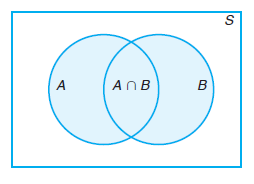

P(A) + P(B) is the sum of all the probabilities in A plus the sum of all the probabilities in B. Therefore, we have added the probabilities in (A ∩ B) twice. Since these probabilities add up to P(A ∩ B), we must subtract this probability once to obtain the sum of the probabilities in A ∪ B. In case event A and B are mutually exclusive, then

> If A and B are mutually exclusive, then P(A ∪ B) = P(A) + P(B). Caused by P(A∩B) = P(∅) = 0.

##2. Combinatorics

Combinatorics deals with combinations of objects from a specific finite set. There are certain restrictions that can be applied to form combinations. These restrictions can be in terms of repetition, order or a different criterion.

There are three integral parts of combinatorics,
* permutations
* variations
* combinations

then we will use each of these parts to determine the number of favorable outcomes or the number of all elements in a sample space.

**Permutations**,  represents the number of different possible ways we can arrange a set of elements. These elements can be digits, letters, objects or even people. Consider the three letters a, b, and c. The possible permutations are

abc, acb, bac, bca, cab, and cba.

Thus, we see that there are 6 distinct arrangements.

In general, n distinct objects can be arranged in
> n(n − 1)(n − 2) · · · (3)(2)(1) ways.

There is a notation for such a number.
> For any non-negative integer n, n!, called “n factorial,” is defined as n! = n(n − 1) · · · (2)(1), with special case 0! = 1.

Then the number of permutations of n objects is n!.

For example, we have 3 candidates player to get Ballon d'or Award. How many the total number of different ways these players could split the position of 3 top player?

In [ ]:
perm = permutations([dataset['Name'][0], dataset['Name'][1], dataset['Name'][2]]) #('Lionel Messi', 'Cristiano Ronaldo', 'Kylian Mbapp')
for i in list(perm):
    print (i)

('Lionel Messi', 'Cristiano Ronaldo', 'Kylian Mbapp')
('Lionel Messi', 'Kylian Mbapp', 'Cristiano Ronaldo')
('Cristiano Ronaldo', 'Lionel Messi', 'Kylian Mbapp')
('Cristiano Ronaldo', 'Kylian Mbapp', 'Lionel Messi')
('Kylian Mbapp', 'Lionel Messi', 'Cristiano Ronaldo')
('Kylian Mbapp', 'Cristiano Ronaldo', 'Lionel Messi')


next, based on the dataset chelsea has 9 central defenders. The coach uses a 3-4-3 formation in a match. How many ways can there be to choose 3 starting lineups from 9 players?

In [ ]:
chelsea_defender = dataset[(dataset['Club'] == 'Chelsea') & (dataset['Best Pos'] == 'D (C)')]
perm = permutations(chelsea_defender['Name'],3)
j = 0
for i in list(perm):
    print (i)
    j+=1
print (j)

('Thiago Silva', 'Andreas Christensen', 'Antonio Rdiger')
('Thiago Silva', 'Andreas Christensen', 'Kurt Zouma')
('Thiago Silva', 'Andreas Christensen', 'Xavier Mbuyamba')
('Thiago Silva', 'Andreas Christensen', 'Charlie Wiggett')
('Thiago Silva', 'Andreas Christensen', 'Dynel Simeu')
('Thiago Silva', 'Andreas Christensen', 'Sam McClelland')
('Thiago Silva', 'Andreas Christensen', 'Bashir Humphreys')
('Thiago Silva', 'Antonio Rdiger', 'Andreas Christensen')
('Thiago Silva', 'Antonio Rdiger', 'Kurt Zouma')
('Thiago Silva', 'Antonio Rdiger', 'Xavier Mbuyamba')
('Thiago Silva', 'Antonio Rdiger', 'Charlie Wiggett')
('Thiago Silva', 'Antonio Rdiger', 'Dynel Simeu')
('Thiago Silva', 'Antonio Rdiger', 'Sam McClelland')
('Thiago Silva', 'Antonio Rdiger', 'Bashir Humphreys')
('Thiago Silva', 'Kurt Zouma', 'Andreas Christensen')
('Thiago Silva', 'Kurt Zouma', 'Antonio Rdiger')
('Thiago Silva', 'Kurt Zouma', 'Xavier Mbuyamba')
('Thiago Silva', 'Kurt Zouma', 'Charlie Wiggett')
('Thiago Silva', 'Kur

As a result, the coach has 504 different ways to pick 3 defender for his line up. In general, we have the theorem that follows.

> The number of permutations of n distinct objects taken r at a time is
nVr = n!/(n − r)! (also known as **Variations**)

**Combinations**,  represent the number of different ways we can pick certain elements of a set. The number of combinations equals the number of variations over the number of permutations.

>The number of combinations of n distinct objects taken r at a time is
nCr= n!/r!(n − r)! .

Now consider the coach will choose 2 center midfielders from 10 players, regardless of the order between the two. So the combination that the coach can choose is

In [ ]:
chelsea_midfield = dataset[(dataset['Club'] == 'Chelsea') & (dataset['Best Pos'] == 'M (C)')]
comb = combinations(chelsea_midfield['Name'],2)
j = 0
for i in list(comb):
    print (i)
    j+=1
print (j)

('Mateo Kovacic', "N'Golo Kant")
('Mateo Kovacic', 'Mason Mount')
('Mateo Kovacic', 'Leo Castledine')
('Mateo Kovacic', 'Billy Gilmour')
('Mateo Kovacic', 'George McEachran')
('Mateo Kovacic', 'Ben Elliott')
('Mateo Kovacic', 'Marcel Lewis')
('Mateo Kovacic', 'Lewis Bate')
('Mateo Kovacic', 'Xavier Simons')
("N'Golo Kant", 'Mason Mount')
("N'Golo Kant", 'Leo Castledine')
("N'Golo Kant", 'Billy Gilmour')
("N'Golo Kant", 'George McEachran')
("N'Golo Kant", 'Ben Elliott')
("N'Golo Kant", 'Marcel Lewis')
("N'Golo Kant", 'Lewis Bate')
("N'Golo Kant", 'Xavier Simons')
('Mason Mount', 'Leo Castledine')
('Mason Mount', 'Billy Gilmour')
('Mason Mount', 'George McEachran')
('Mason Mount', 'Ben Elliott')
('Mason Mount', 'Marcel Lewis')
('Mason Mount', 'Lewis Bate')
('Mason Mount', 'Xavier Simons')
('Leo Castledine', 'Billy Gilmour')
('Leo Castledine', 'George McEachran')
('Leo Castledine', 'Ben Elliott')
('Leo Castledine', 'Marcel Lewis')
('Leo Castledine', 'Lewis Bate')
('Leo Castledine', 'Xavie

##3. Conditional Probability

The probability of an event B occurring when it is known that some event A has occurred is called a **conditional probability** and is denoted by P(B|A). The symbol P(B|A) is usually read “the probability that B occurs given that A occurs” or simply “the probability of B, given A”.

Technically, P(B|A) is a probability of intersection event A and B over probability of A. Then we have 2 condition about that. First one, when event A and B are **Independent** and second, when they are **dependent**.

Dependent Conditional Probability
> P(B|A) = P(B ∩ A)/P(A) , P(A)>0

Independent Conditional Probability
> P(B|A) = P(B), caused by P(B ∩ A) = P(B) * P(A)

For example, Given the sample space is all football player. Probability of striker (A) after event of football player in Spanish First Division (B).

In [ ]:
all_player = dataset['Name'].count() #Number of all football player
sfd_player = dataset[dataset['Division'] == 'Spanish First Division']['Name'].count() #Number of player in Spanish First Division
striker = dataset[dataset['Best Pos'] == 'ST (C)']['Name'].count() #Number of all Striker
sfd_striker = dataset[(dataset['Division'] == 'Spanish First Division') & (dataset['Best Pos'] == 'ST (C)')]['Name'].count() #Number of striker in Spanish First Division

P_B = sfd_player/all_player #probability of player in SFD over all player
print('Probability of event B: ', sfd_player,"/",all_player,"=", P_B)

P_A = striker/all_player #probability of striker over all player
print('Probability of event A: ', striker,"/",all_player,"=",P_A)

P_AandB = sfd_striker/all_player #probability of SFD striker over all player
print('Probability of intersection event A and B: ', sfd_striker,"/",all_player,"=",P_AandB)

P_AconB = P_AandB/P_B #probability of striker SFD over player in SFD
print('Conditional probability of event A after event B: ', P_AandB,"/",P_B,"=",P_AconB)

Probability of event B:  732 / 144750 = 0.00505699481865285
Probability of event A:  22460 / 144750 = 0.15516407599309154
Probability of intersection event A and B:  92 / 144750 = 0.0006355785837651122
Conditional probability of event A after event B:  0.0006355785837651122 / 0.00505699481865285 = 0.12568306010928962


**Bayes Therorem**

Bayes theorem allows us to find a relationship between the different conditional probabilities of two events. Knowing both conditional probabilities between the two helps us make more reasonable arguments about which one causes the other.

Based on multiplication rules, we have P(B ∩ A) = P(A).P(B|A) and P(A ∩ B) = P(B).P(A|B). Since P(B ∩ A) = P(A ∩ B), then...

> P(A).P(B|A) = (B).P(A|B); or 

> P(B|A) = (B).P(A|B)/P(A); or vice versa

Let's explore this fictional scenario, your scout manager wants you to do research about what club are looking for in recent Attacking Midfield Players, good Passing Attribute (>14) or good Finishing Attribute (>14).

In [22]:
#good Passing Attribute
print("All AM(C): ",len(dataset[(dataset['Best Pos'] == 'AM (C)')]))
print("AM(C) good Passing: ",len(dataset[(dataset['Best Pos'] == 'AM (C)') & (dataset['Pas'] > 14)]))
#let say P(A) probability of good passing attacking midfield
print("P(A)", len(dataset[(dataset['Best Pos'] == 'AM (C)') & (dataset['Pas'] > 14)]) / len(dataset[(dataset['Best Pos'] == 'AM (C)')]))

All AM(C):  8082
AM(C) good Passing:  327
P(A) 0.04046028210838901


In [21]:
#good Finishing Attribute
print("All AM(C): ",len(dataset[(dataset['Best Pos'] == 'AM (C)')]))
print("AM(C) good Finishing: ",len(dataset[(dataset['Best Pos'] == 'AM (C)') & (dataset['Fin'] > 14)]))
#let say P(B) probability of good finishing attacking midfield
print("P(B)", len(dataset[(dataset['Best Pos'] == 'AM (C)') & (dataset['Fin'] > 14)]) / len(dataset[(dataset['Best Pos'] == 'AM (C)')]))

All AM(C):  8082
AM(C) good Finishing:  59
P(B) 0.007300173224449394


Next we need to determine the priority of the attributes that need to be considered between Passing and Finishing.First we search for players with good Passing **and** good Finishing.

In [24]:
dataset[(dataset['Best Pos'] == 'AM (C)') & (dataset['Pas'] > 14) & (dataset['Fin'] > 14)]
print(len(dataset[(dataset['Best Pos'] == 'AM (C)') & (dataset['Pas'] > 14) & (dataset['Fin'] > 14)]))

18


Then, here it is the probability of good Passing AM(C) among good Finishing AM(C) or P(A|B)

In [25]:
#P(A|B)
18/59

0.3050847457627119

Vide versa, the probability of good Finishing AM(C) among good Passing AM(C) or P(B|A)

In [26]:
#P(B|A)
18/327

0.05504587155963303

Since P(A|B) > P(B|A), we prioritize choosing players with good finishing first, then good passing.

##4. Probability Distributions

##5. Central Limit Theorem

##6. Estimation

##7. Hypothesis Testing

##Reference:

1. Walpole, R. E., Myers, R. H., Myers, S. L.,, Ye, K. (2017). Probability & statistics for engineers and scientists 9th Edition. Pearson Education.
2. The Data Science Course 2022: Complete Data Science Bootcamp (https://www.udemy.com/course/the-data-science-course-complete-data-science-bootcamp/)